In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [57]:
data = pd.read_csv('train.csv',sep = ";")
data.shape

(45211, 17)

In [58]:
df_test = pd.read_csv('test.csv',sep = ';')
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [59]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [62]:
df = data.copy()

# Age Column

<AxesSubplot:xlabel='age', ylabel='Count'>

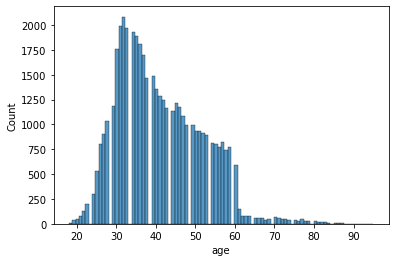

In [63]:
sns.histplot(df['age'])

In [64]:
#Transforming Age into categories
age_groups = [(df['age'].between(18,35)),
              (df['age'].between(35,50)),
             (df['age'].between(50,95))]

age_groups_labels = ['Adult','Middle','Senior Citizen']

df['age_groups'] = np.select(age_groups,age_groups_labels)

df['age_groups'].value_counts(normalize=True)*100


Middle            42.133552
Adult             37.395767
Senior Citizen    20.470682
Name: age_groups, dtype: float64

In [65]:
#Transforming Age into categories
age_groups = [(df_test['age'].between(18,35)),
              (df_test['age'].between(35,50)),
             (df_test['age'].between(50,95))]

age_groups_labels = ['Adult','Middle','Senior Citizen']

df_test['age_groups'] = np.select(age_groups,age_groups_labels)

df_test['age_groups'].value_counts(normalize=True)*100

Middle            42.955098
Adult             36.540588
Senior Citizen    20.504313
Name: age_groups, dtype: float64

# Duration Column

<AxesSubplot:xlabel='duration', ylabel='Density'>

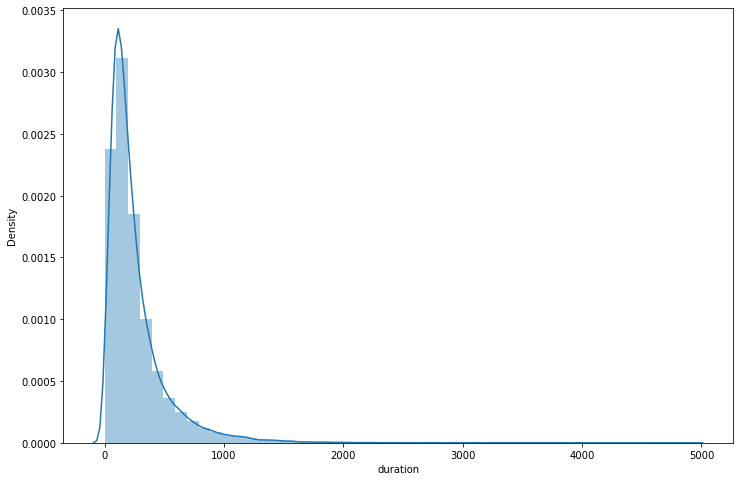

In [66]:
plt.figure(figsize=(12,8))
sns.distplot(df['duration'])

In [67]:
#Transforming Duration into categories
duration_groups = [(df['duration'].between(0,120)),
              (df['duration'].between(120,600)),
              (df['duration'].between(600,4918))]

duration_labels = ['Not Interseted','Moderately Interested','Highly Interested']

df['duration_groups'] = np.select(duration_groups,duration_labels)

df['duration_groups'].value_counts(normalize=True)*100


Moderately Interested    60.553848
Not Interseted           31.063237
Highly Interested         8.382916
Name: duration_groups, dtype: float64

In [68]:
#Transforming Duration into categories
duration_groups = [(df_test['duration'].between(0,120)),
              (df_test['duration'].between(120,600)),
              (df_test['duration'].between(600,4918))]

duration_labels = ['Not Interseted','Moderately Interested','Highly Interested']

df_test['duration_groups'] = np.select(duration_groups,duration_labels)

df_test['duration_groups'].value_counts(normalize=True)*100

Moderately Interested    60.163681
Not Interseted           30.502101
Highly Interested         9.334218
Name: duration_groups, dtype: float64

# Days Columns

<AxesSubplot:xlabel='day', ylabel='Density'>

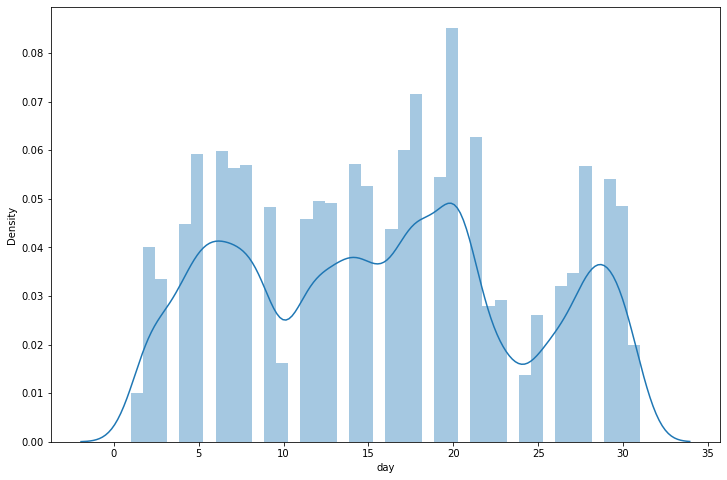

In [69]:
plt.figure(figsize=(12,8))
sns.distplot(df['day'])

In [70]:
#transforming day label

day_groups = [(df['day'].between(1,8)),
             (df['day'].between(8,15)),
             (df['day'].between(15,25)),
             (df['day'].between(25,31))]
day_labels = ['1st Week','2nd Week','3rd Week','4th Week']

df['day_groups'] = np.select(day_groups,day_labels)

df['day_groups'].value_counts(normalize=True)*100

3rd Week    33.903254
1st Week    25.745947
2nd Week    22.788702
4th Week    17.562098
Name: day_groups, dtype: float64

In [71]:
#transforming day label

day_groups = [(df_test['day'].between(1,8)),
             (df_test['day'].between(8,15)),
             (df_test['day'].between(15,25)),
             (df_test['day'].between(25,31))]
day_labels = ['1st Week','2nd Week','3rd Week','4th Week']

df_test['day_groups'] = np.select(day_groups,day_labels)

df_test['day_groups'].value_counts(normalize=True)*100

3rd Week    34.085379
1st Week    24.839637
2nd Week    23.247069
4th Week    17.827914
Name: day_groups, dtype: float64

In [72]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_groups,duration_groups,day_groups
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Senior Citizen,Moderately Interested,1st Week
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Middle,Moderately Interested,1st Week
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adult,Not Interseted,1st Week
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Middle,Not Interseted,1st Week
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adult,Moderately Interested,1st Week


# Balance Column

<AxesSubplot:xlabel='balance', ylabel='Density'>

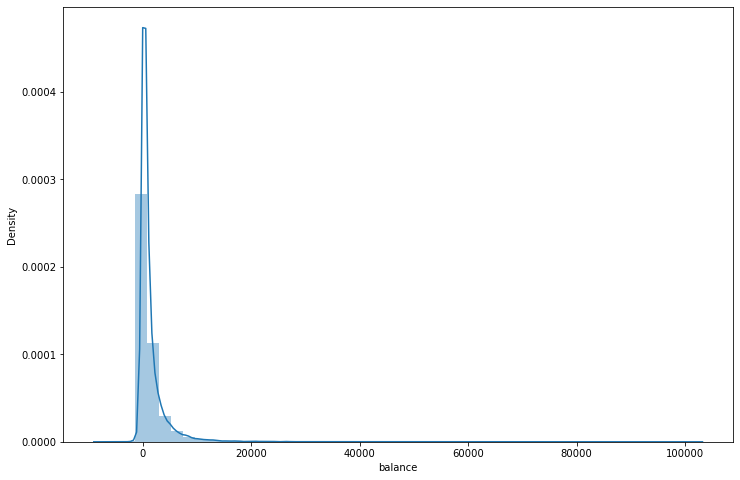

In [73]:
plt.figure(figsize=(12,8))
sns.distplot(df['balance'])

In [75]:
bal_groups = [(df['balance'].between(-8019,0)),
             (df['balance'].between(0,448)),
             (df['balance']).between(448,102127)]

bal_labels = ['Negative Bal','Moderate Bal','High Bal']

df['bal_groups'] = np.select(bal_groups,bal_labels)

df['bal_groups'].value_counts(normalize=True)*100

High Bal        49.994470
Moderate Bal    33.903254
Negative Bal    16.102276
Name: bal_groups, dtype: float64

In [76]:
df_test.balance.describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

In [78]:
bal_groups = [(df_test['balance'].between(-3313,0)),
             (df_test['balance'].between(0,444)),
             (df_test['balance']).between(444,71188)]

bal_labels = ['Negative Bal','Moderate Bal','High Bal']

df_test['bal_groups'] = np.select(bal_groups,bal_labels)

df_test['bal_groups'].value_counts(normalize=True)*100

High Bal        49.988940
Moderate Bal    34.019022
Negative Bal    15.992037
Name: bal_groups, dtype: float64

In [79]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_groups,duration_groups,day_groups,bal_groups
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Senior Citizen,Moderately Interested,1st Week,High Bal
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Middle,Moderately Interested,1st Week,Moderate Bal
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,Adult,Not Interseted,1st Week,Moderate Bal
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,Middle,Not Interseted,1st Week,High Bal
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,Adult,Moderately Interested,1st Week,Moderate Bal


# Pdays column

In [80]:
data['pdays'].value_counts(normalize=True)*100

-1      81.736745
 182     0.369379
 92      0.325142
 91      0.278693
 183     0.278693
          ...    
 465     0.002212
 529     0.002212
 18      0.002212
 434     0.002212
 831     0.002212
Name: pdays, Length: 559, dtype: float64

In [81]:
df['pdays_groups'] = ['Not contacted earlier'  if i<0 else 'Contacted Earlier' for i in df['pdays'] ]

In [82]:
df_test['pdays_groups'] = ['Not contacted earlier'  if i<0 else 'Contacted Earlier' for i in df_test['pdays'] ]

In [83]:
df['pdays_groups'].value_counts(normalize=True)*100

Not contacted earlier    81.736745
Contacted Earlier        18.263255
Name: pdays_groups, dtype: float64

In [84]:
df.describe(percentiles=[0.01,0.05,0.1,0.25,0.50,0.75,0.85,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
1%,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
5%,27.000000,-172.000000,3.000000,35.000000,1.000000,-1.000000,0.000000
10%,29.000000,0.000000,5.000000,58.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000


<AxesSubplot:xlabel='previous', ylabel='Density'>

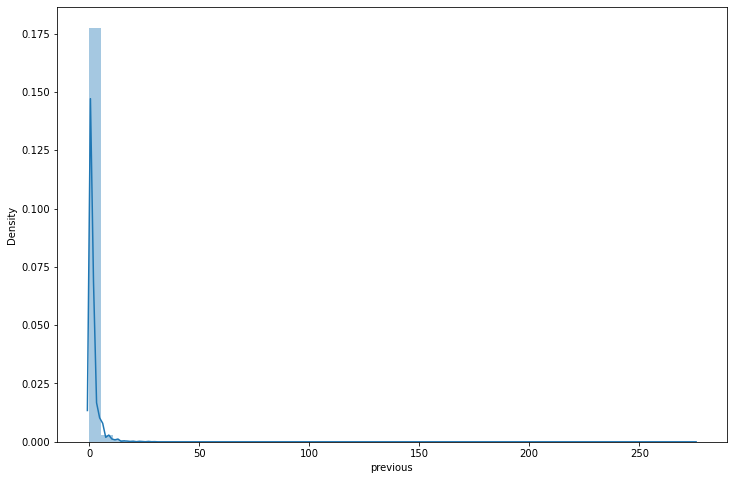

In [85]:
plt.figure(figsize=(12,8))
sns.distplot(df['previous'])

In [86]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_groups,duration_groups,day_groups,bal_groups,pdays_groups
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,Senior Citizen,Moderately Interested,1st Week,High Bal,Not contacted earlier
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,Middle,Moderately Interested,1st Week,Moderate Bal,Not contacted earlier


In [87]:
#Dropping irrelevant columns
df.drop(['age','balance','day','duration','month','pdays'],axis=1,inplace= True)

In [88]:
df_test.drop(['age','balance','day','duration','month','pdays'],axis=1,inplace= True)

In [89]:
df.head()

,job,marital,education,default,housing,loan,contact,campaign,previous,poutcome,y,age_groups,duration_groups,day_groups,bal_groups,pdays_groups
0,management,married,tertiary,no,yes,no,unknown,1,0,unknown,no,Senior Citizen,Moderately Interested,1st Week,High Bal,Not contacted earlier
1,technician,single,secondary,no,yes,no,unknown,1,0,unknown,no,Middle,Moderately Interested,1st Week,Moderate Bal,Not contacted earlier
2,entrepreneur,married,secondary,no,yes,yes,unknown,1,0,unknown,no,Adult,Not Interseted,1st Week,Moderate Bal,Not contacted earlier
3,blue-collar,married,unknown,no,yes,no,unknown,1,0,unknown,no,Middle,Not Interseted,1st Week,High Bal,Not contacted earlier
4,unknown,single,unknown,no,no,no,unknown,1,0,unknown,no,Adult,Moderately Interested,1st Week,Moderate Bal,Not contacted earlier


In [90]:
data['job'].value_counts(normalize=True)*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [91]:
data['contact'].value_counts(normalize=True)*100

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64

In [92]:
data['poutcome'].value_counts(normalize=True)*100

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

In [93]:
data['default'].value_counts(normalize=True)*100

no     98.197341
yes     1.802659
Name: default, dtype: float64

<AxesSubplot:xlabel='marital', ylabel='count'>

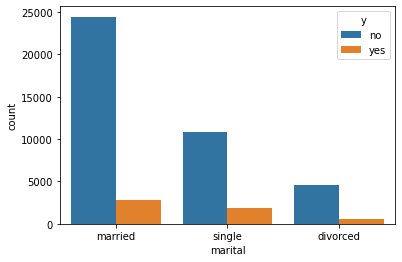

In [94]:
sns.countplot(data['marital'],hue = data['y'])

<AxesSubplot:xlabel='education', ylabel='count'>

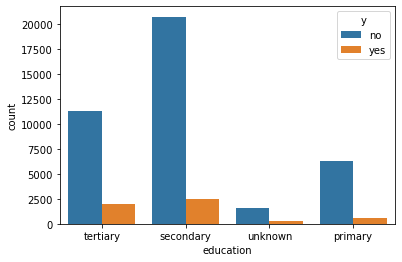

In [95]:
sns.countplot(data['education'],hue = data['y'])

<AxesSubplot:xlabel='contact', ylabel='count'>

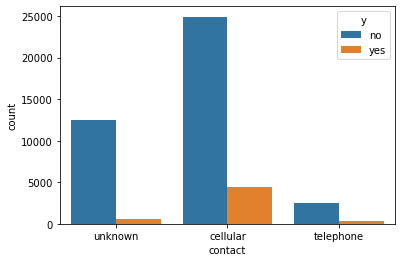

In [96]:
sns.countplot(data['contact'],hue = data['y'])

In [97]:
df.head()

,job,marital,education,default,housing,loan,contact,campaign,previous,poutcome,y,age_groups,duration_groups,day_groups,bal_groups,pdays_groups
0,management,married,tertiary,no,yes,no,unknown,1,0,unknown,no,Senior Citizen,Moderately Interested,1st Week,High Bal,Not contacted earlier
1,technician,single,secondary,no,yes,no,unknown,1,0,unknown,no,Middle,Moderately Interested,1st Week,Moderate Bal,Not contacted earlier
2,entrepreneur,married,secondary,no,yes,yes,unknown,1,0,unknown,no,Adult,Not Interseted,1st Week,Moderate Bal,Not contacted earlier
3,blue-collar,married,unknown,no,yes,no,unknown,1,0,unknown,no,Middle,Not Interseted,1st Week,High Bal,Not contacted earlier
4,unknown,single,unknown,no,no,no,unknown,1,0,unknown,no,Adult,Moderately Interested,1st Week,Moderate Bal,Not contacted earlier


In [98]:
#Encoding the Catagorical varibales

label_enc = LabelEncoder()

In [99]:
# features = ['job','marital','education','default','housing','loan','contact','poutcome','age_groups','duration_groups','day_groups','bal_groups','pdays_groups']

In [100]:
df['job'] = label_enc.fit_transform(df['job'])
df['marital'] = label_enc.fit_transform(df['marital'])
df['education'] = label_enc.fit_transform(df['education'])
df['default'] = label_enc.fit_transform(df['default'])
df['housing'] = label_enc.fit_transform(df['housing'])
df['loan'] = label_enc.fit_transform(df['loan'])
df['contact'] = label_enc.fit_transform(df['contact'])
df['poutcome'] = label_enc.fit_transform(df['poutcome'])
df['age_groups'] = label_enc.fit_transform(df['age_groups'])
df['duration_groups'] = label_enc.fit_transform(df['duration_groups'])
df['day_groups'] = label_enc.fit_transform(df['day_groups'])
df['pdays_groups'] = label_enc.fit_transform(df['pdays_groups'])
df['bal_groups'] = label_enc.fit_transform(df['bal_groups'])
df['y'] = label_enc.fit_transform(df['y'])

In [101]:
df_test['job'] = label_enc.fit_transform(df_test['job'])
df_test['marital'] = label_enc.fit_transform(df_test['marital'])
df_test['education'] = label_enc.fit_transform(df_test['education'])
df_test['default'] = label_enc.fit_transform(df_test['default'])
df_test['housing'] = label_enc.fit_transform(df_test['housing'])
df_test['loan'] = label_enc.fit_transform(df_test['loan'])
df_test['contact'] = label_enc.fit_transform(df_test['contact'])
df_test['poutcome'] = label_enc.fit_transform(df_test['poutcome'])
df_test['age_groups'] = label_enc.fit_transform(df_test['age_groups'])
df_test['duration_groups'] = label_enc.fit_transform(df_test['duration_groups'])
df_test['day_groups'] = label_enc.fit_transform(df_test['day_groups'])
df_test['pdays_groups'] = label_enc.fit_transform(df_test['pdays_groups'])
df_test['bal_groups'] = label_enc.fit_transform(df_test['bal_groups'])
df_test['y'] = label_enc.fit_transform(df_test['y'])

In [102]:
X = df.drop(['y'],axis=1)
y= df['y']

In [103]:
rfc  = RandomForestClassifier()

In [104]:
rfc.fit(X,y)

RandomForestClassifier()

In [105]:
X_test = df_test.drop(['y'],axis=1)
y_test= df_test['y']

In [106]:
pred = rfc.predict(X_test)

In [107]:
print("Training Accuracy: ",rfc.score(X , y))

Training Accuracy:  0.9708035655039703


In [108]:
print("Testing Accuracy : ",metrics.accuracy_score(y_test,pred))

Testing Accuracy :  0.971245299712453


In [109]:
print(metrics.confusion_matrix(y_test,pred))

[[3974   26]
 [ 104  417]]


In [110]:
print("Precision: ",metrics.precision_score(y_test, pred))

Precision:  0.9413092550790068


In [111]:
print("Recall: ",metrics.recall_score(y_test, pred))

Recall:  0.800383877159309


In [112]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]

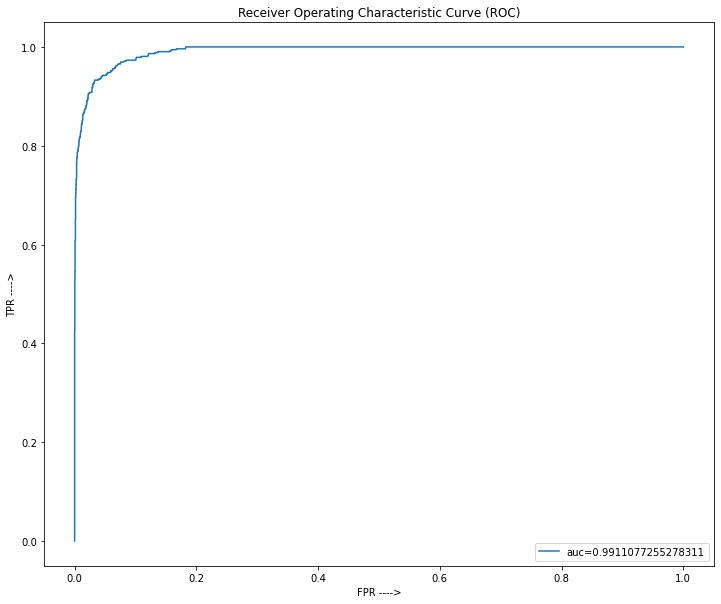

In [113]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()